In [1]:
using ControlSystems
using Plots
using Interact
using OrdinaryDiffEq

gr(size = (400,400), legend = false)

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12525760889957594240\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-14016676720516897787\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-12525760889957594240\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [2]:
ωs = exp10.(range(-1, stop=3, length=1000))
s = tf("s")

TransferFunction{ControlSystems.SisoRational{Int64}}
1s
--
1

Continuous-time transfer function model

In [29]:
bodeplot(1/s, ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-int.svg")
savefig("bode-int.pdf")

In [104]:
bodeplot(s, ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-der.svg")
savefig("bode-der.pdf")

In [39]:
styles = filter((s->begin
                s in Plots.supported_styles()
            end), [:solid, :dash, :dot, :dashdot, :dashdotdot])

5-element Array{Symbol,1}:
 :solid     
 :dash      
 :dot       
 :dashdot   
 :dashdotdot

In [40]:
[:dash, :dot]

2-element Array{Symbol,1}:
 :dash
 :dot 

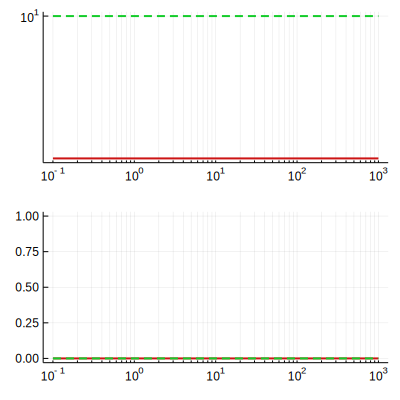

In [44]:
bodeplot([tf(1), tf(10)], ωs, line=(2, :auto))
xlabel!("")
ylabel!("")
title!("")

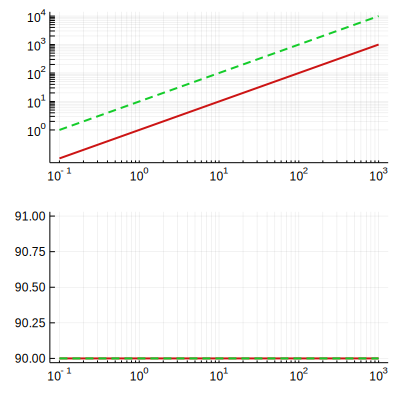

In [45]:
bodeplot([s, 10*s], ωs, line=(2, :auto))
xlabel!("")
ylabel!("")
title!("")

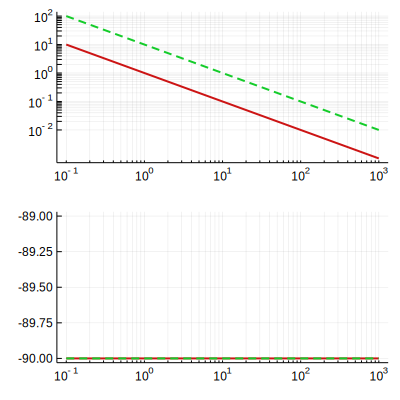

In [46]:
bodeplot([1/s, 10/s], ωs, line=(2, :auto))
xlabel!("")
ylabel!("")
title!("")

In [25]:
bodeplot(1/(s+1), ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-1pr.svg")
savefig("bode-1pr.pdf")

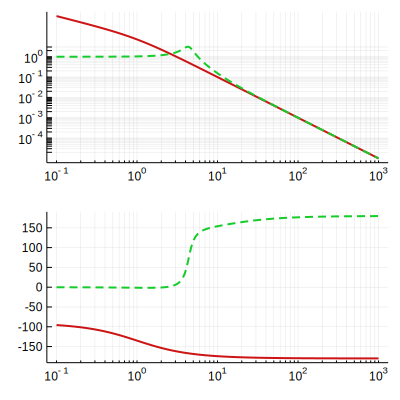

In [51]:
bodeplot([10/(s*(s+1)), feedback(((s+10)/(s+3))*10/(s*(s+1)))], ωs, line=(2, :auto))
xlabel!("")
ylabel!("")
title!("")
#savefig("bode-sis-com.svg")
#savefig("bode-sis-com.pdf")

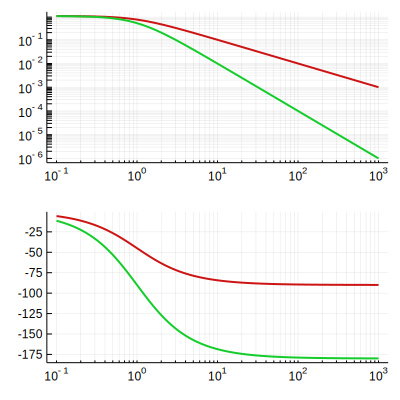

In [9]:
bodeplot([1/(s+1), 1/((s+1)^2)], ωs, w=2)
xlabel!("")
ylabel!("")
title!("")

In [109]:
G = 100/((s^2+0.01*s+1)*(s+10))
comp = (s+1)/(s+3)
bodeplot([G, feedback(G*comp)], ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-sis2-com.svg")
savefig("bode-sis2-com.pdf")

In [110]:
G = 100/((s^2+0.01*s+1)*(s+10))
comp = (s+7)/(s+3)
bodeplot([G, feedback(G*comp)], ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-sis3-com.svg")
savefig("bode-sis3-com.pdf")

In [3]:
ui = @manipulate for ω in 0.1:0.05:5
    ts = 0.0:0.01:100.0
    u = [sin(ω*t) for t in ts]
    lsimplot(100/((s^2+0.01*s+1)*(s+10)), u, ts, size = (1200,400))
end

┌ Warning: Accessing `scope.id` is deprecated, use `scopeid(scope)` instead.
│   caller = ip:0x0
└ @ Core :-1


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["ω"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>99,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
50, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/roberto/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/roberto/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/roberto/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/roberto/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/roberto/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\",\"1.05\",\"1.1\",\"1.15\",\"1.2\",\"1.25\",\"1.3\",\"1.35\",\"1.4\",\"1.45\",\"1.5\",\"1.55\",\"1.6\",\"1.65\",\"1.7\",\"1.75\",\"1.8\",\"1.85\",\"1.9\",\"1.95\",\"2.0\",\"2.05\",\"2.1\",\"2.15\",\"2.2\",\"2.25\",\"2.3\",\"2.35\",\"2.4\",\"2.45\",\"2.5\",\"2.55\",\"2.6\",\"2.65\",\"2.7\",\"2.75\",\"2.8\",\"2.85\",\"2.9\",\"2.95\",\"3.0\",\"3.05\",\"3.1\",\"3.15\",

In [26]:
bodeplot(1/(s^2+0.3s+1), ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-2pc.svg")
savefig("bode-2pc.pdf")

In [27]:
bodeplot([1/((s+1)*(s+100))], ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-2pr.svg")
savefig("bode-2pr.pdf")

In [28]:
bodeplot([1/((s+1)^2)], ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-2pi.svg")
savefig("bode-2pi.pdf")

In [95]:
bodeplot((100/(s+100))*(1s/(s+1)), ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-fil-ban.svg")
savefig("bode-fil-ban.pdf")

In [98]:
bodeplot(1/(s+10), ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-fil-baj.svg")
savefig("bode-fil-baj.pdf")

In [103]:
bodeplot(s/(s+10), ωs, w=2)
xlabel!("")
ylabel!("")
title!("")
savefig("bode-fil-alt.svg")
savefig("bode-fil-alt.pdf")